In [2]:
import pandas as pd
import numpy as np
import random as rnd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import accuracy_score


import warnings
warnings.filterwarnings(action='ignore')


<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [19]:

df = pd.read_excel('.\integrated_rmdup_process_complete.xlsx')
test_df = pd.read_excel('.\\test.xlsx')
data = df

X_train = df.drop("열1",axis=1)
similarity_cafe = cosine_similarity(X_train,X_train).argsort()[:,::-1]

def recommend_cafe_list(df,cafe,top=103):
    target_cafe_index = df[df['열1'] == cafe].index.values
    sim_index = similarity_cafe[target_cafe_index,:top].reshape(-1)
    sim_index = sim_index[sim_index!=target_cafe_index]
    result = df.iloc[sim_index].sort_values('coffee',ascending=False)[:5]
    # print(result)
    return result

cafename = '서촌금상고로케'

result = recommend_cafe_list(data,cafe=cafename)


# data['name'] = data['열1']
# data.set_index('열1', inplace=True)
data.rename(columns={'열1':'name'},inplace=True)
result.rename(columns={'열1':'name'},inplace=True)
index = data.index[(data['name'] == cafename)]

user = data.iloc[index]

print(result['name'])


14997      꽈페 홍대점
8497        부트브레드
14900    꿀넹쿠키 연남점
1037        일팔공일오
11737       빵미제빵소
Name: name, dtype: object


In [21]:
print(result.columns)

result1 = result[:1]
result2 = result[1:2]
result3 = result[2:3]
result4 = result[3:4]
result5 = result[4:5]

result_fin = user.append(result)
print(user, type(user))
print(result1, type(result1))
print(result2, type(result2))
print(result3, type(result3))
print(result4, type(result4))
print(result5, type(result5))

Index(['name', 'friendly', 'dessert', 'interior', 'clean', 'coffee', 'special',
       'bread', 'photo', 'non_coffee',
       ...
       'breakfast', 'private', 'design', 'deafening', 'class_various',
       'swimming_pool', 'air_condition', 'group2', 'fun_various',
       'side_dish2'],
      dtype='object', length=103)
   friendly  dessert  interior     clean    coffee   special  bread     photo  \
0  0.825413        0  0.039601  0.516185  0.065771  0.774793    1.0  0.077135   

   non_coffee  tea  ...  breakfast  private  design  deafening  class_various  \
0    0.095386    0  ...          0        0       0          0              0   

   swimming_pool  air_condition  group2  fun_various  side_dish2  
0              0              0       0            0           0  

[1 rows x 102 columns] <class 'pandas.core.frame.DataFrame'>
         name  friendly  dessert  interior  clean  coffee  special  bread  \
14997  꽈페 홍대점       266        0       111    152      63      363    478   



               friendly  dessert  interior     clean    coffee   special  \
friendly       1.000000      NaN  0.933231  0.999828  0.998235  0.999333   
dessert             NaN      NaN       NaN       NaN       NaN       NaN   
interior       0.933231      NaN  1.000000  0.930197  0.948176  0.935995   
clean          0.999828      NaN  0.930197  1.000000  0.998128  0.998872   
coffee         0.998235      NaN  0.948176  0.998128  1.000000  0.996793   
...                 ...      ...       ...       ...       ...       ...   
swimming_pool       NaN      NaN       NaN       NaN       NaN       NaN   
air_condition       NaN      NaN       NaN       NaN       NaN       NaN   
group2              NaN      NaN       NaN       NaN       NaN       NaN   
fun_various         NaN      NaN       NaN       NaN       NaN       NaN   
side_dish2          NaN      NaN       NaN       NaN       NaN       NaN   

                  bread     photo  non_coffee  tea  ...  breakfast  private  \
friendly

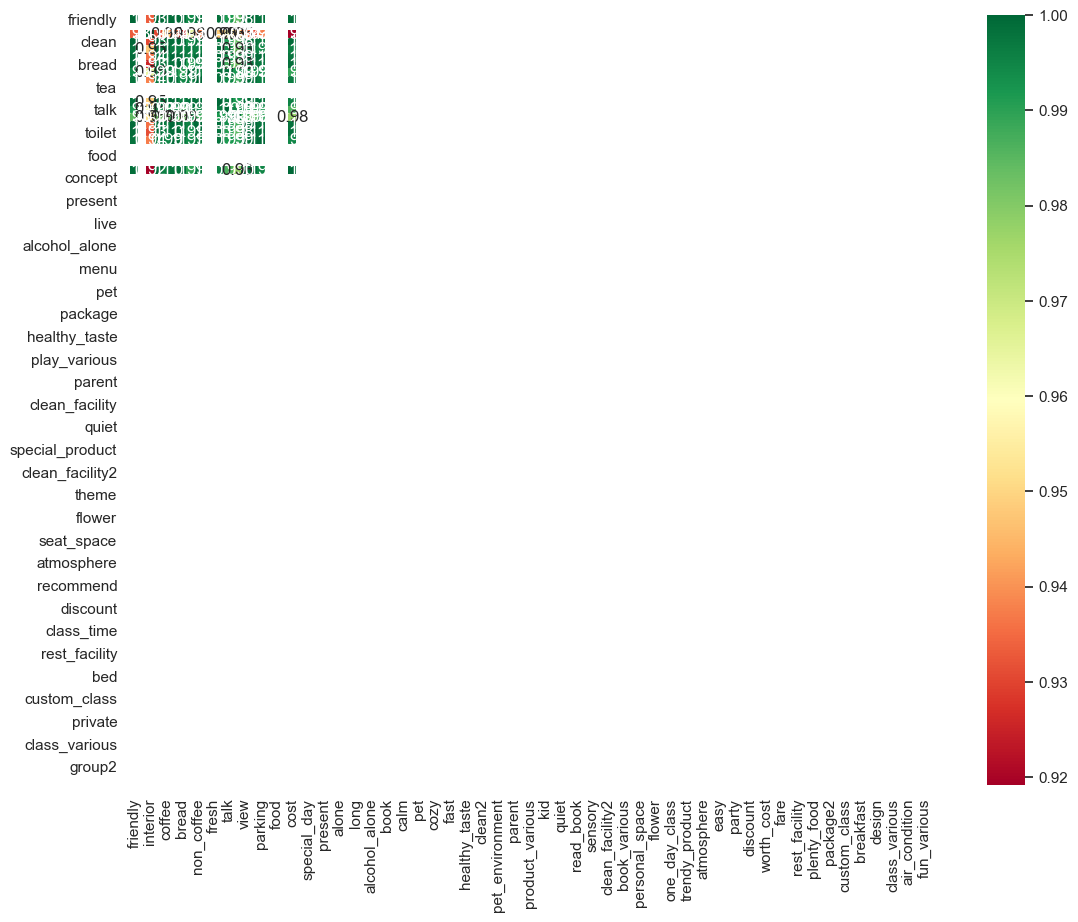

In [116]:
# df.set_index('열1', inplace=True)
# test_df.set_index('열1', inplace=True)

# result.set_index('열1', inplace=True)

corrmat = result_fin.corr()
print(corrmat)
# top_corr_features = corrmat.index[abs(corrmat["coffee"])>=0.3]
top_corr_features = corrmat.index
print("top_corr_features = ", top_corr_features)

plt.figure(figsize=(13,10))
g = sns.heatmap(result_fin[top_corr_features].corr(), annot = True, cmap="RdYlGn")
plt.show()


# 
# # print(data)

# Y_train = df["열1"]
# X_test = test_df.drop("열1",axis=1).copy()

# X_train.shape, Y_train.shape, X_test.shape


# 

# knn = KNeighborsClassifier(n_neighbors = 3)
# knn.fit(X_train, Y_train)
# Y_pred = knn.predict(X_test)
# print(accuracy_score(Y_train, Y_pred))



# acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
# acc_knn

# X_test = 

                  1206
name           서촌금상고로케
friendly          2397
dessert              0
interior           115
clean             1499
...                ...
swimming_pool        0
air_condition        0
group2               0
fun_various          0
side_dish2           0

[103 rows x 1 columns]


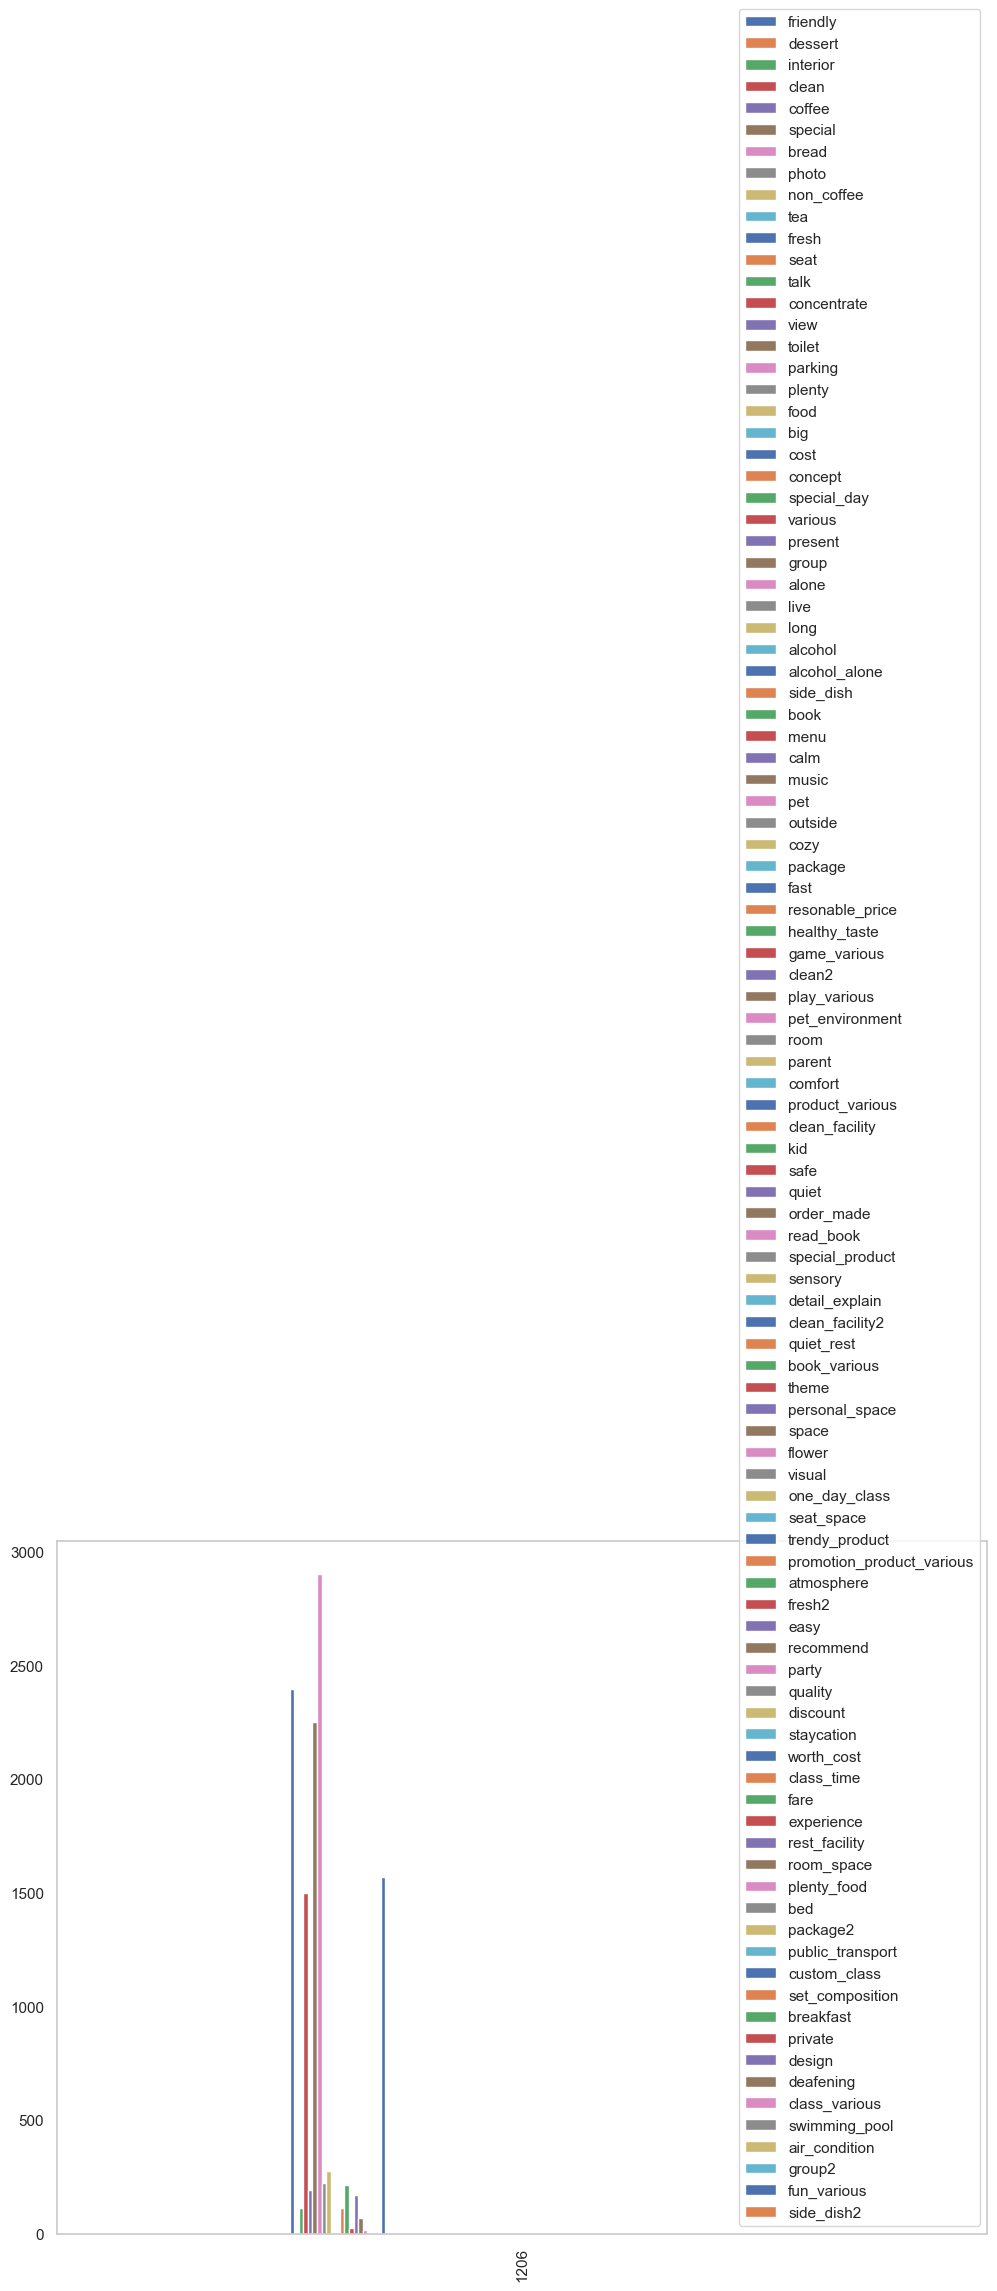

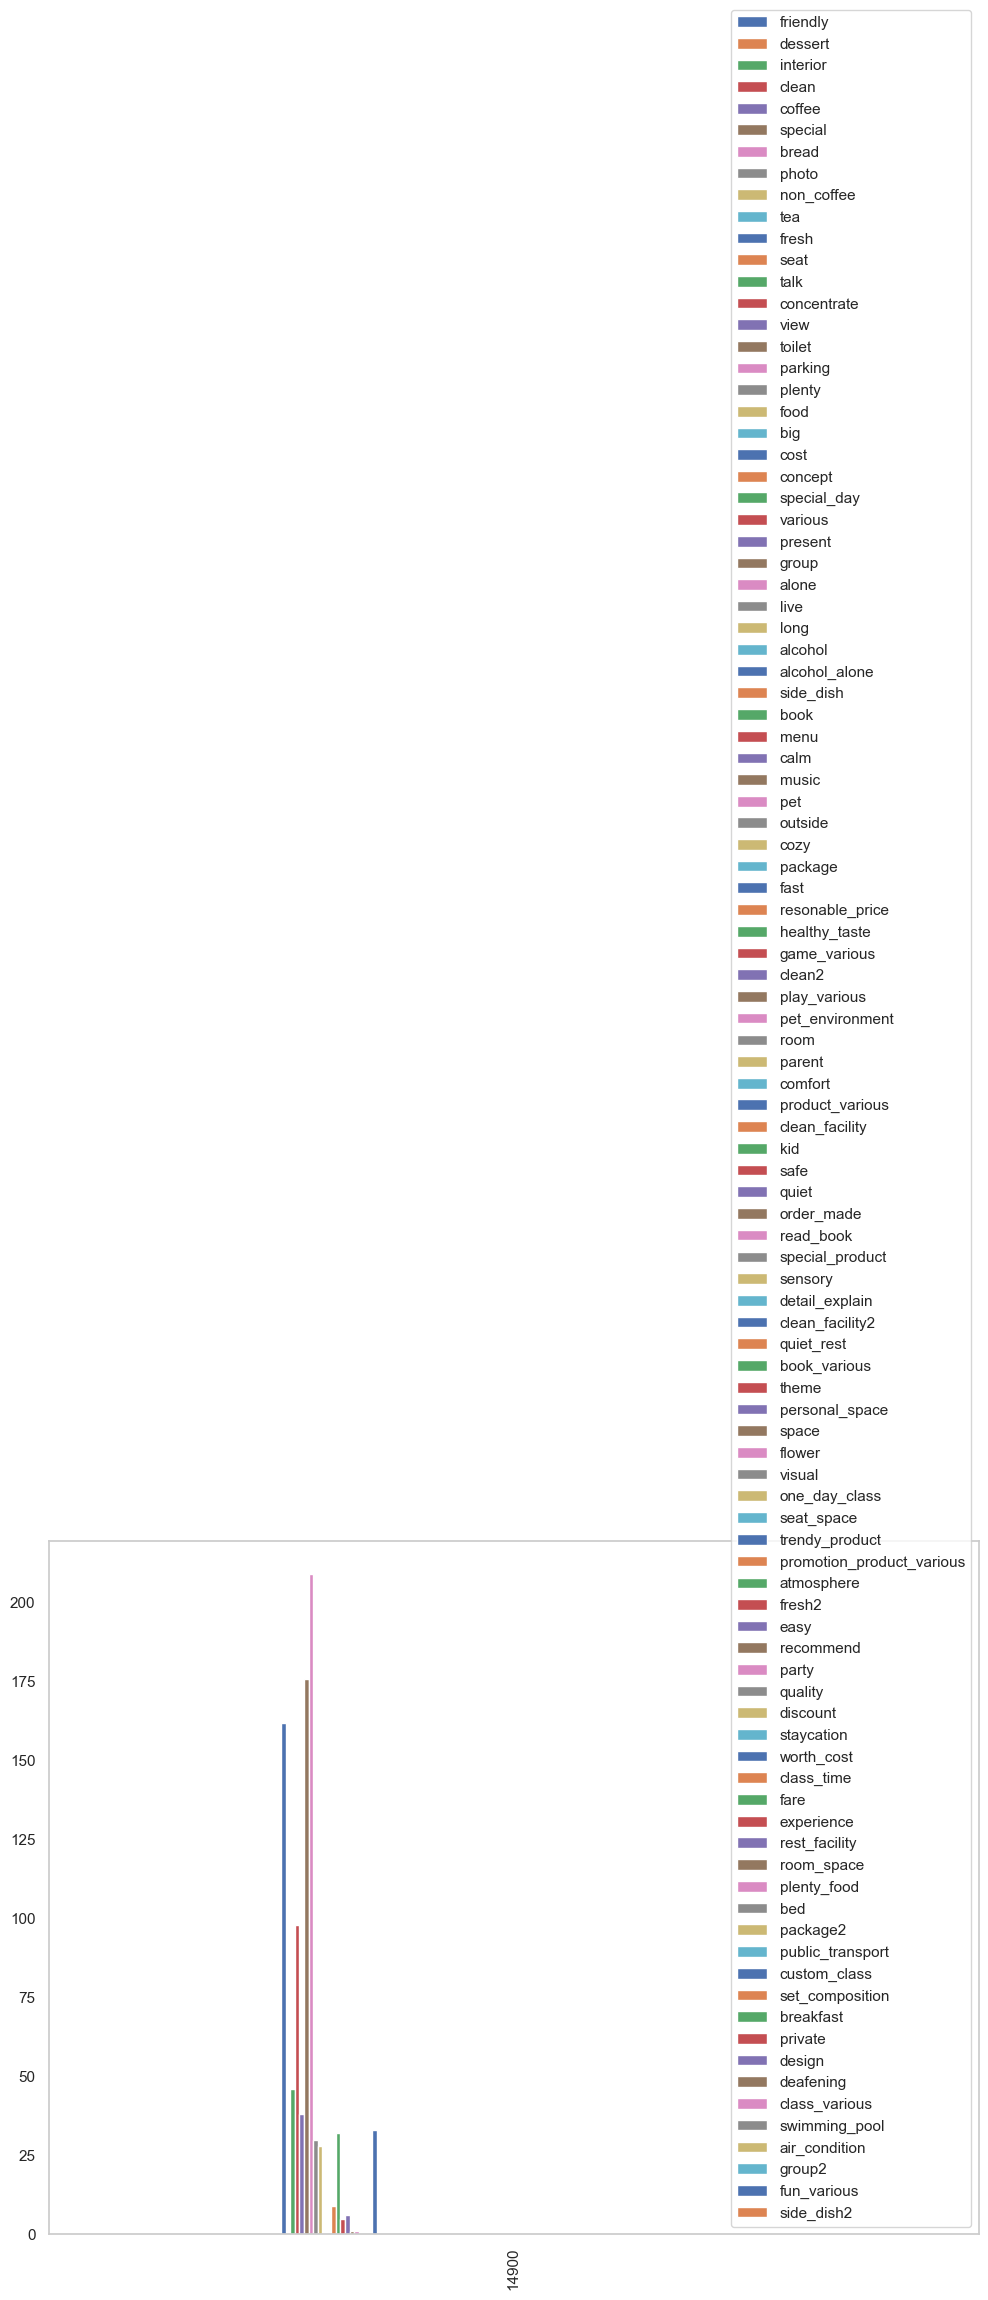

In [150]:
%matplotlib inline

# user.plot()
# print(result1)
# result1.plot(figsize=(20,15),grid=False)

user.plot(figsize=(12,9),kind='bar',grid=False)
# col = userT.columns[0]
# userT[0].plot(kind='bar', rot = 0)
result1.plot(figsize=(12,9),kind='bar',grid=False)
plt.show()

In [22]:
test_df = pd.read_excel('.\\test.xlsx')
test_df = test_df.drop("열1",axis=1)
user = test_df[:1]
test1 = test_df[1:2]
test2 = test_df[2:3]
test3 = test_df[3:4]
test4 = test_df[4:5]
test5 = test_df[5:6]
test6 = test_df[6:7]
cs1 = cosine_similarity(user,test1)
cs2 = cosine_similarity(user,test2)
cs3 = cosine_similarity(user,test3)
cs4 = cosine_similarity(user,test4)
cs5 = cosine_similarity(user,test5)
cs6 = cosine_similarity(user,test6)
print(cs1)
print(cs2)
print(cs3)
print(cs4)
print(cs5)
print(cs6)

[[0.94539303]]
[[0.9488793]]
[[0.9618291]]
[[0.94950884]]
[[0.96736252]]
[[0.96898649]]
